In [75]:
#data frame banake daset mein dalna

import pandas as pd
import os
from sqlalchemy import create_engine 
import logging 
import time

logging.basicConfig(
    filename = "/Users/Sakshi.Nagayach/Downloads/LOGS/ingestion_db.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s", 
    filemode ="a"
)

engine = create_engine ('sqlite:///inventory.db')

def ingest_db(df,table_name,engine):
    '''this fuction will ingest the dataframe into database table '''
    df.to_sql(table_name, con=engine, if_exists="replace", index = False)

def load_row_data():
  '''this function will load the data CSV as dataframe and ingest into db'''
  start = time.time()
  for file in os.listdir("/Users/Sakshi.Nagayach/Downloads/VDA"):
    if ".csv" in file:
        df = pd.read_csv("/Users/Sakshi.Nagayach/Downloads/VDA/"+file)
        logging.info(f"ingesting {file} in db")
        ingest_db(df,file[:-4],engine)   
    end = time.time()
    total_time = (end - start)/60
    logging.info("===============ingesting complete in db=======================")
    logging.info(f"\ntotal time taken {total_time} minites")

if __name__ == '__main__':
    load_row_data()
        

In [74]:

#For deteleing the existing table run this code
import os
import sqlite3
import pandas as pd

# Connect to SQLite DB
conn = sqlite3.connect("inventory.db")
cursor = conn.cursor()

# 1. Get list of CSV file names (without .csv)
folder_path = "/Users/Sakshi.Nagayach/Downloads/VDA"
csv_table_names = set(
    [file[:-4] for file in os.listdir(folder_path) if file.endswith(".csv")]
)

# 2. Get existing table names from DB
db_tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
db_table_names = set(db_tables['name'].tolist())

# 3. Find old/extra tables that are in DB but not in VDA folder
tables_to_drop = db_table_names - csv_table_names

# 4. Drop those extra tables
for table in tables_to_drop:
    print(f"Dropping table: {table}")
    cursor.execute(f"DROP TABLE IF EXISTS {table}")

conn.commit()
conn.close()


In [76]:
#Exploratory data analysis
#understand the data set to explaore how the dtaa is present in the database andif there is a need of creating some aggregated table that can help
#vendor selection for profitibility 
#product pricing Optimization

import pandas as pd
import sqlite3
conn= sqlite3.connect('inventory.db')

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type ='table'",conn)
tables #this is the line for printing the files from a directory

for table in tables["name"]:
    print("-"*50,f'{table}',"-"*50)
    print("count of record:", pd.read_sql(f"select count(*) as count from {table}", conn)["count"][0])
    display(pd.read_sql(f"select * from {table} limit 5", conn))
 

-------------------------------------------------- begin_inventory --------------------------------------------------
count of record: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
count of record: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
count of record: 48576


,InventoryID,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,Paydate,PurchasePrice,Quantity,Dollars,Classification
0,37_PAETHSMOUTH_18106,37,18106,Barefoot Cellars Pink Moscat,1.5L,3252,E & J GALLO WINERY,10633,12-06-2024,24-06-2024,03-07-2024,08-08-2024,7.14,5,35.70,2
1,22_SHARNWICK_44038,22,44038,Barefoot Pnt Grigio Cal,1.5L,3252,E & J GALLO WINERY,10633,12-06-2024,23-06-2024,03-07-2024,08-08-2024,5.86,8,46.88,2
2,68_SOLARIS_12901,68,12901,Madria Sangria,1.5L,3252,E & J GALLO WINERY,10633,12-06-2024,22-06-2024,03-07-2024,08-08-2024,5.19,6,31.14,2
3,57_LANTEGLOS_12124,57,12124,Gallo Family Vyds Sweet Red,750mL,3252,E & J GALLO WINERY,10633,12-06-2024,20-06-2024,03-07-2024,08-08-2024,3.24,12,38.88,2
4,34_PITMERDEN_34133,34,34133,Turning Leaf RSV Cab Svgn,1.5L,3252,E & J GALLO WINERY,10633,12-06-2024,21-06-2024,03-07-2024,08-08-2024,6.12,6,36.72,2


-------------------------------------------------- purchase_prices --------------------------------------------------
count of record: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- sales --------------------------------------------------
count of record: 48576


,InventoryID,Store,Brand,Description,Size,SalesQuantity,salesdollars,salesprice,salesdate,Volume,classification,exciseTax,vendorNo,VendorName
0,14_BROMWICH_2412,14,2412,JP Wiser's Rye,750mL,1,19.99,19.99,23-02-2024,750,1,0.79,17035,PERNOD RICARD USA
1,14_BROMWICH_24151,14,24151,Mas Janeil Cotes Roussillon,750mL,1,10.99,10.99,13-02-2024,750,2,0.11,9165,ULTRA BEVERAGE COMPANY LLP
2,14_BROMWICH_24151,14,24151,Mas Janeil Cotes Roussillon,750mL,1,10.99,10.99,14-02-2024,750,2,0.11,9165,ULTRA BEVERAGE COMPANY LLP
3,14_BROMWICH_24151,14,24151,Mas Janeil Cotes Roussillon,750mL,1,10.99,10.99,24-02-2024,750,2,0.11,9165,ULTRA BEVERAGE COMPANY LLP
4,14_BROMWICH_24151,14,24151,Mas Janeil Cotes Roussillon,750mL,1,10.99,10.99,26-02-2024,750,2,0.11,9165,ULTRA BEVERAGE COMPANY LLP


-------------------------------------------------- vendor_invoice --------------------------------------------------
count of record: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


In [ ]:
#purchases table contains actual purchase data , including the date of purchase by the vendors and amount paid and total quantity purchased.
#purchase#
#as the the data that we need for analysis is distributed in different tables , we need to create a summary table containing:
#urchase transations made by vendor
#sale tarnsection data
#actual product price from vendor 


In [77]:
purchases=pd.read_sql_query("select *from purchases",conn)
purchases

,InventoryID,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,Paydate,PurchasePrice,Quantity,Dollars,Classification
0,37_PAETHSMOUTH_18106,37,18106,Barefoot Cellars Pink Moscat,1.5L,3252,E & J GALLO WINERY,10633,12-06-2024,24-06-2024,03-07-2024,08-08-2024,7.14,5,35.70,2
1,22_SHARNWICK_44038,22,44038,Barefoot Pnt Grigio Cal,1.5L,3252,E & J GALLO WINERY,10633,12-06-2024,23-06-2024,03-07-2024,08-08-2024,5.86,8,46.88,2
2,68_SOLARIS_12901,68,12901,Madria Sangria,1.5L,3252,E & J GALLO WINERY,10633,12-06-2024,22-06-2024,03-07-2024,08-08-2024,5.19,6,31.14,2
3,57_LANTEGLOS_12124,57,12124,Gallo Family Vyds Sweet Red,750mL,3252,E & J GALLO WINERY,10633,12-06-2024,20-06-2024,03-07-2024,08-08-2024,3.24,12,38.88,2
4,34_PITMERDEN_34133,34,34133,Turning Leaf RSV Cab Svgn,1.5L,3252,E & J GALLO WINERY,10633,12-06-2024,21-06-2024,03-07-2024,08-08-2024,6.12,6,36.72,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48571,74_PAENTMARWY_8450,74,8450,E & J Brandy VS,1.75L,3252,E & J GALLO WINERY,10781,22-06-2024,27-06-2024,07-07-2024,08-08-2024,13.86,5,69.30,1
48572,53_HILLFAR_7374,53,7374,New Amsterdam Mango Vodka,750mL,3252,E & J GALLO WINERY,10781,22-06-2024,29-06-2024,07-07-2024,08-08-2024,6.86,12,82.32,1
48573,76_DONCASTER_18106,76,18106,Barefoot Cellars Pink Moscat,1.5L,3252,E & J GALLO WINERY,10781,22-06-2024,29-06-2024,07-07-2024,08-08-2024,7.14,4,28.56,2
48574,17_OLDHAM_10421,17,10421,Barefoot Moscato Cal,1.5L,3252,E & J GALLO WINERY,10781,22-06-2024,30-06-2024,07-07-2024,08-08-2024,5.90,5,29.50,2


In [78]:
purchase_prices=pd.read_sql_query("select *from purchase_prices ",conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.
...,...,...,...,...,...,...,...,...,...
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS


In [69]:
sales=pd.read_sql_query("select *from sales",conn)
sales

,InventoryID,Store,Brand,Description,Size,SalesQuantity,salesdollars,salesprice,salesdate,Volume,classification,exciseTax,vendorNo,VendorName
0,14_BROMWICH_2412,14,2412,JP Wiser's Rye,750mL,1,19.99,19.99,23-02-2024,750,1,0.79,17035,PERNOD RICARD USA
1,14_BROMWICH_24151,14,24151,Mas Janeil Cotes Roussillon,750mL,1,10.99,10.99,13-02-2024,750,2,0.11,9165,ULTRA BEVERAGE COMPANY LLP
2,14_BROMWICH_24151,14,24151,Mas Janeil Cotes Roussillon,750mL,1,10.99,10.99,14-02-2024,750,2,0.11,9165,ULTRA BEVERAGE COMPANY LLP
3,14_BROMWICH_24151,14,24151,Mas Janeil Cotes Roussillon,750mL,1,10.99,10.99,24-02-2024,750,2,0.11,9165,ULTRA BEVERAGE COMPANY LLP
4,14_BROMWICH_24151,14,24151,Mas Janeil Cotes Roussillon,750mL,1,10.99,10.99,26-02-2024,750,2,0.11,9165,ULTRA BEVERAGE COMPANY LLP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,12-02-2024,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
48572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,13-02-2024,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE
48573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,19-02-2024,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
48574,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,22-02-2024,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE


In [79]:
vendor_invoice=pd.read_sql_query("select *from vendor_invoice",conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None
...,...,...,...,...,...,...,...,...,...,...
5538,9622,WEIN BAUER INC,2025-01-06,13626,2024-12-21,2025-02-10,90,1563.00,8.60,None
5539,9625,WESTERN SPIRITS BEVERAGE CO,2025-01-10,13661,2024-12-23,2025-02-18,4617,37300.48,186.50,None
5540,3664,WILLIAM GRANT & SONS INC,2025-01-02,13643,2024-12-22,2025-02-04,9848,202815.78,932.95,None
5541,9815,WINE GROUP INC,2025-01-03,13602,2024-12-20,2025-02-08,24747,149007.56,819.54,None


In [88]:
vendor_sales_summary =pd.read_sql_query("""WITH 
FreightSummary AS (
   select
       VendorNumber,
       SUM(Freight)AS FreightCost
   from vendor_invoice
   group by VendorNumber
),
PurchaseSummary AS (
    select
       p.VendorNumber,
       p.VendorName,
       p.Brand,
       p.Description,
       p.PurchasePrice,
       pp.Price AS ActualPrice,
       pp.Volume,
       SUM(p.Quantity) AS TotalPurchaseQuantity,
       SUM(P.Dollars)AS TotalPurchaseDollars
    from purchases p
    JOIN purchase_prices pp
       on p.Brand =pp.Brand
    Where p.PurchasePrice>0
    Group by  p.VendorNumber, p.VendorName, p.Brand, p.Description, p.PurchasePrice,pp.Price ,pp.Volume
),
SalesSummary AS (
    SELECT
       vendorNo,
       Brand,
       SUM(SalesQuantity) AS TotalSalesQuantity,
       SUM(salesdollars) as TotalSalesDollars,
       SUM(exciseTax) as TotalExciseTax,
       SUM(salesprice) as TotalSalesPrice
    FROM sales 
    Group by vendorNo,Brand
)
SELECT
    ps.VendorNumber,
       ps.VendorName,
       ps.Brand,
       ps.Description,
       ps.PurchasePrice,
       ps.ActualPrice,
       ps.Volume,
       ps.TotalPurchaseQuantity,
       ps.TotalPurchaseDollars,
       ss.TotalSalesQuantity,
       ss.TotalSalesDollars,
       ss.TotalExciseTax,
       ss.TotalSalesPrice,
       fs.FreightCost
from PurchaseSummary ps
LEFT JOIN SalesSummary ss
     ON ps.VendorNumber =ss.VendorNo
     AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs
     ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC """, conn)

vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalSalesPrice,FreightCost
0,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,5910,107798.40,946.0,23640.54,1738.14,2573.97,123780.22
1,3960,DIAGEO NORTH AMERICA INC,4260,Capt Morgan Original Barrel,16.66,21.99,1750,6409,106773.94,NaN,NaN,NaN,NaN,257032.07
2,480,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750,4581,81404.37,452.0,10859.48,355.88,2578.93,89286.27
3,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,3163,73349.97,401.0,11628.99,736.79,3105.93,144929.24
4,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,2585,67907.95,498.0,17923.02,915.02,3275.09,68601.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,10754,PERFECTA WINES,24606,Fortant Cab Svgn,5.15,11.99,750,1,5.15,NaN,NaN,NaN,NaN,28720.52
4273,17035,PERNOD RICARD USA,33326,Jacobs Crk Shiraz,4.63,7.99,750,1,4.63,NaN,NaN,NaN,NaN,123780.22
4274,480,BACARDI USA INC,4042,Bacardi Dragon Berry,0.72,0.99,50,5,3.60,8.0,7.92,0.42,2.97,89286.27
4275,3960,DIAGEO NORTH AMERICA INC,7341,Smirnoff Watermelon,0.75,0.99,50,3,2.25,508.0,502.92,26.57,86.13,257032.07


In [95]:
#Finding the inconsistency in our data 
vendor_sales_summary.isnull().sum()
#output we have some null values in our final table

VendorNumber                0
VendorName                  0
Brand                       0
Description                 0
PurchasePrice               0
ActualPrice                 0
Volume                      0
TotalPurchaseQuantity       0
TotalPurchaseDollars        0
TotalSalesQuantity       1319
TotalSalesDollars        1319
TotalExciseTax           1319
TotalSalesPrice          1319
FreightCost                 0
dtype: int64

In [94]:
vendor_sales_summary.dtypes
#output we have different type of data presert in our data such as volumn in sheet it 
#numeric but here it is showing the object so we have to change is 

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                    object
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalExciseTax           float64
TotalSalesPrice          float64
FreightCost              float64
dtype: object

In [ ]:
#This query generates a vendor-wise sales and purchase summary, which is valuable for :
#performance Optimization:
#thr qurey involes heavy joins and agg on large scale like sales and purchases.
#Storing the pre-agg result avoids repeated expensive compution
#helps in analysing sales and purchase and pricing for different vendors and brands 
#furture benifits of storing this data for faaster dashborading and reporting 
#instead od running expensive queries each time, dashboard can fatch data quickly from vendor_sales_summary


In [97]:
vendor_sales_summary["VendorName"].unique()
#irreleavent whitespaces 

array(['PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'MARTIGNETTI COMPANIES',
       'BROWN-FORMAN CORP          ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'PROXIMO SPIRITS INC.       ', 'CAMPARI AMERICA            ',
       'STOLI GROUP,(USA) LLC      ', 'CONSTELLATION BRANDS INC   ',
       'SAZERAC CO INC             ', 'MOET HENNESSY USA INC      ',
       'PERFECTA WINES             ', 'REMY COINTREAU USA INC     ',
       'HEAVEN HILL DISTILLERIES   ', 'M S WALKER INC             ',
       'E & J GALLO WINERY         ', 'SAZERAC NORTH AMERICA INC. ',
       'EDRINGTON AMERICAS         ', 'SIDNEY FRANK IMPORTING CO  ',
       'WILLIAM GRANT & SONS INC   ', 'TREASURY WINE ESTATES      ',
       'VINEYARD BRANDS INC        ', 'CASTLE BRANDS CORP.        ',
       'PINE STATE TRADING CO      ', 'BANFI PRODUCTS CORP        ',
       'WINE GROUP INC             ', 'S

In [99]:
vendor_sales_summary["Description"].unique()

array(['Absolut 80 Proof', 'Capt Morgan Original Barrel',
       'Grey Goose Vodka', ..., 'Bacardi Dragon Berry',
       'Smirnoff Watermelon', 'Mr Boston Triple Sec'], dtype=object)

In [100]:
vendor_sales_summary["Volume"]=vendor_sales_summary["Volume"].astype("float64")

In [101]:
vendor_sales_summary.fillna(0, inplace=True)

In [102]:
vendor_sales_summary["VendorName"]=vendor_sales_summary["VendorName"].str.strip()

In [103]:
vendor_sales_summary["VendorName"].unique()

array(['PERNOD RICARD USA', 'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'MARTIGNETTI COMPANIES', 'BROWN-FORMAN CORP',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'PROXIMO SPIRITS INC.',
       'CAMPARI AMERICA', 'STOLI GROUP,(USA) LLC',
       'CONSTELLATION BRANDS INC', 'SAZERAC CO INC',
       'MOET HENNESSY USA INC', 'PERFECTA WINES',
       'REMY COINTREAU USA INC', 'HEAVEN HILL DISTILLERIES',
       'M S WALKER INC', 'E & J GALLO WINERY',
       'SAZERAC NORTH AMERICA INC.', 'EDRINGTON AMERICAS',
       'SIDNEY FRANK IMPORTING CO', 'WILLIAM GRANT & SONS INC',
       'TREASURY WINE ESTATES', 'VINEYARD BRANDS INC',
       'CASTLE BRANDS CORP.', 'PINE STATE TRADING CO',
       'BANFI PRODUCTS CORP', 'WINE GROUP INC',
       'SOUTHERN WINE & SPIRITS NE', 'STE MICHELLE WINE ESTATES',
       'KOBRAND CORPORATION', 'LUXCO INC', 'DISARONNO INTERNATIONAL LLC',
       'PHILLIPS PRODUCTS CO.', 'MHW LTD', 'PALM BAY INTERNATIONAL INC'

In [111]:
vendor_sales_summary["GrossProfit"]=vendor_sales_summary["TotalSalesDollars"]-vendor_sales_summary["TotalPurchaseDollars"]

In [114]:
vendor_sales_summary["ProfitMargin"]=(vendor_sales_summary["GrossProfit"]/vendor_sales_summary["TotalSalesDollars"])*100

In [115]:
vendor_sales_summary["StockTurnover"]=vendor_sales_summary['TotalSalesQuantity']/vendor_sales_summary['TotalPurchaseQuantity']

In [116]:
vendor_sales_summary["SalesPurchaseRatio"]=vendor_sales_summary["TotalSalesDollars"]/vendor_sales_summary["TotalPurchaseDollars"]

In [117]:
vendor_sales_summary


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalSalesPrice,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,5910,107798.40,946.0,23640.54,1738.14,2573.97,123780.22,-84157.86,-355.989584,0.160068,0.219303
1,3960,DIAGEO NORTH AMERICA INC,4260,Capt Morgan Original Barrel,16.66,21.99,1750.0,6409,106773.94,0.0,0.00,0.00,0.00,257032.07,-106773.94,-inf,0.000000,0.000000
2,480,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,4581,81404.37,452.0,10859.48,355.88,2578.93,89286.27,-70544.89,-649.615727,0.098668,0.133402
3,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,3163,73349.97,401.0,11628.99,736.79,3105.93,144929.24,-61720.98,-530.750994,0.126778,0.158541
4,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,2585,67907.95,498.0,17923.02,915.02,3275.09,68601.68,-49984.93,-278.886761,0.192650,0.263931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,10754,PERFECTA WINES,24606,Fortant Cab Svgn,5.15,11.99,750.0,1,5.15,0.0,0.00,0.00,0.00,28720.52,-5.15,-inf,0.000000,0.000000
4273,17035,PERNOD RICARD USA,33326,Jacobs Crk Shiraz,4.63,7.99,750.0,1,4.63,0.0,0.00,0.00,0.00,123780.22,-4.63,-inf,0.000000,0.000000
4274,480,BACARDI USA INC,4042,Bacardi Dragon Berry,0.72,0.99,50.0,5,3.60,8.0,7.92,0.42,2.97,89286.27,4.32,54.545455,1.600000,2.200000
4275,3960,DIAGEO NORTH AMERICA INC,7341,Smirnoff Watermelon,0.75,0.99,50.0,3,2.25,508.0,502.92,26.57,86.13,257032.07,500.67,99.552613,169.333333,223.520000


In [120]:
#Now we will creat one blank tabel for that we need to use this cursur 
cursor = conn.cursor()


In [123]:
cursor.execute( """Create table vendor_sales_summary(
              VendorNumber INT, 
              VendorName     VARCHAR(100),
              Brand   INT,
              Description VARCHAR(100),
              PurchasePrice DECIMAL(10,2),
              ActualPrice DECIMAL(10,2),
              Volume ,
              TotalPurchaseQuantity INT,
              TotalPurchaseDollars DECIMAL(15,2),
              TotalSalesQuantity  INT,
              TotalSalesDollars  DECIMAL(15,2),
              TotalExciseTax   DECIMAL(15,2), 
              TotalSalesPrice  DECIMAL(15,2),
              FreightCost     DECIMAL(15,2), 
              GrossProfit   DECIMAL(15,2),  
              ProfitMargin  DECIMAL(15,2),   
              StockTurnover  DECIMAL(15,2),  
              SalesPurchaseRatio DECIMAL(15,2),
              PRIMARY KEY (VendorNumber,Brand)
);
""")

In [124]:
#now we will insert our table into this database
vendor_sales_summary.to_sql("vendor_sales_summary",conn, if_exists ="replace", index = False)

4277

In [7]:
#Python script for creating the final table adn cleaning that data with sql
import pandas as pd
import logging 
from ingestion_db import ingest_db
import sqlite3

logging.basicConfig(
    filename = "/Users/Sakshi.Nagayach/Downloads/LOGS/vendor_summary_logs",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s", 
    filemode ="a"
)
def vendor_sales_summary(conn):
    '''this function will creat a merged table form other tables to get the vendor summary'''
    vendor_sales_summary =pd.read_sql_query("""WITH FreightSummary AS (
       select
          VendorNumber,
          SUM(Freight)AS FreightCost
       from vendor_invoice
       group by VendorNumber
      ),
      PurchaseSummary AS (
          select
              p.VendorNumber,
              p.VendorName,
              p.Brand,
              p.Description,
              p.PurchasePrice,
              pp.Price AS ActualPrice,
              pp.Volume,
              SUM(p.Quantity) AS TotalPurchaseQuantity,
              SUM(P.Dollars)AS TotalPurchaseDollars
          from purchases p
          JOIN purchase_prices pp
          on p.Brand =pp.Brand
          Where p.PurchasePrice>0
          Group by  p.VendorNumber, p.VendorName, p.Brand, p.Description, p.PurchasePrice,pp.Price ,pp.Volume
        ),
     SalesSummary AS (
         SELECT
           vendorNo,
           Brand,
           SUM(SalesQuantity) AS TotalSalesQuantity,
           SUM(salesdollars) as TotalSalesDollars,
           SUM(exciseTax) as TotalExciseTax,
           SUM(salesprice) as TotalSalesPrice
         FROM sales 
         Group by vendorNo,Brand
        )
    SELECT
       ps.VendorNumber,
       ps.VendorName,
       ps.Brand,
       ps.Description,
       ps.PurchasePrice,
       ps.ActualPrice,
       ps.Volume,
       ps.TotalPurchaseQuantity,
       ps.TotalPurchaseDollars,
       ss.TotalSalesQuantity,
       ss.TotalSalesDollars,
       ss.TotalExciseTax,
       ss.TotalSalesPrice,
       fs.FreightCost
    from PurchaseSummary ps
    LEFT JOIN SalesSummary ss
       ON ps.VendorNumber =ss.VendorNo
       AND ps.Brand = ss.Brand
    LEFT JOIN FreightSummary fs
       ON ps.VendorNumber = fs.VendorNumber
    ORDER BY ps.TotalPurchaseDollars DESC """, conn)

    return vendor_sales_summary


def clean_data(vendor_sales_summary):
    vendor_sales_summary["Volume"]=vendor_sales_summary["Volume"].astype("float64")
    vendor_sales_summary.fillna(0, inplace=True)
    vendor_sales_summary["VendorName"]=vendor_sales_summary["VendorName"].str.strip()
    vendor_sales_summary["GrossProfit"]=vendor_sales_summary["TotalSalesDollars"]-vendor_sales_summary["TotalPurchaseDollars"]
    vendor_sales_summary["ProfitMargin"]=((vendor_sales_summary["GrossProfit"]/vendor_sales_summary["TotalSalesDollars"])*100)
    vendor_sales_summary["StockTurnover"]=vendor_sales_summary['TotalSalesQuantity']/vendor_sales_summary['TotalPurchaseQuantity']
    vendor_sales_summary["SalesPurchaseRatio"]=vendor_sales_summary["TotalSalesDollars"]/vendor_sales_summary["TotalPurchaseDollars"]

    return vendor_sales_summary
if __name__ == '__main__':
    #creating database connection
    conn = sqlite3.connect("inventory.db")

    logging.info("Creating Vendor Summary Table.....")
    summary_df= vendor_sales_summary(conn)
    logging.info(summary_df.head())


    logging.info("Cleaning data.....")
    clean_df= clean_data(summary_df)
    logging.info(clean_df.head())
    
    logging.info("Ingesting data.....")
    ingest_db(clean_df,"vendor_sales_summary",conn)
    logging.info('completed')

In [3]:
#vendor performace analysis after the table we have created 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats 
warnings.filterwarnings('ignore')



In [4]:
#creating database connection
conn = sqlite3.connect('inventory.db')
df = pd.read_sql_query('select * from vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalSalesPrice,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,5910,107798.40,946.0,23640.54,1738.14,2573.97,123780.22,-84157.86,-355.989584,0.160068,0.219303
1,3960,DIAGEO NORTH AMERICA INC,4260,Capt Morgan Original Barrel,16.66,21.99,1750.0,6409,106773.94,0.0,0.00,0.00,0.00,257032.07,-106773.94,-inf,0.000000,0.000000
2,480,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,4581,81404.37,452.0,10859.48,355.88,2578.93,89286.27,-70544.89,-649.615727,0.098668,0.133402
3,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,3163,73349.97,401.0,11628.99,736.79,3105.93,144929.24,-61720.98,-530.750994,0.126778,0.158541
4,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,2585,67907.95,498.0,17923.02,915.02,3275.09,68601.68,-49984.93,-278.886761,0.192650,0.263931


In [5]:
#EDA
#1)Previously we examined the various tables in the database to identify the key variables, underdstand their relationship, and determine which ones should be included in the final analysis
#2)now we will analyse the resultant tabe to gain the insights and insure the data quality 

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
VendorNumber,4277.0,8.435390e+03,13654.115567,60.00,3252.00,6359.000000,9552.000000,173357.000000
Brand,4277.0,1.587068e+04,13423.727427,58.00,4197.00,11703.000000,24953.000000,90631.000000
PurchasePrice,4277.0,1.434166e+01,40.017619,0.36,6.50,9.350000,15.030000,2290.070000
ActualPrice,4277.0,2.092017e+01,52.673412,0.49,9.99,13.990000,21.990000,2999.990000
Volume,4277.0,9.132628e+02,690.365629,50.00,750.00,750.000000,750.000000,18000.000000
TotalPurchaseQuantity,4277.0,1.474583e+02,371.082759,1.00,16.00,47.000000,132.000000,6764.000000
TotalPurchaseDollars,4277.0,1.431415e+03,4357.919293,2.05,178.80,481.950000,1278.200000,107798.400000
TotalSalesQuantity,4277.0,2.410030e+01,66.292045,0.00,0.00,4.000000,20.000000,1155.000000
TotalSalesDollars,4277.0,3.264129e+02,1060.471800,0.00,0.00,71.880000,279.800000,25408.450000
TotalExciseTax,4277.0,1.760043e+01,82.833547,0.00,0.00,0.790000,7.100000,2122.270000


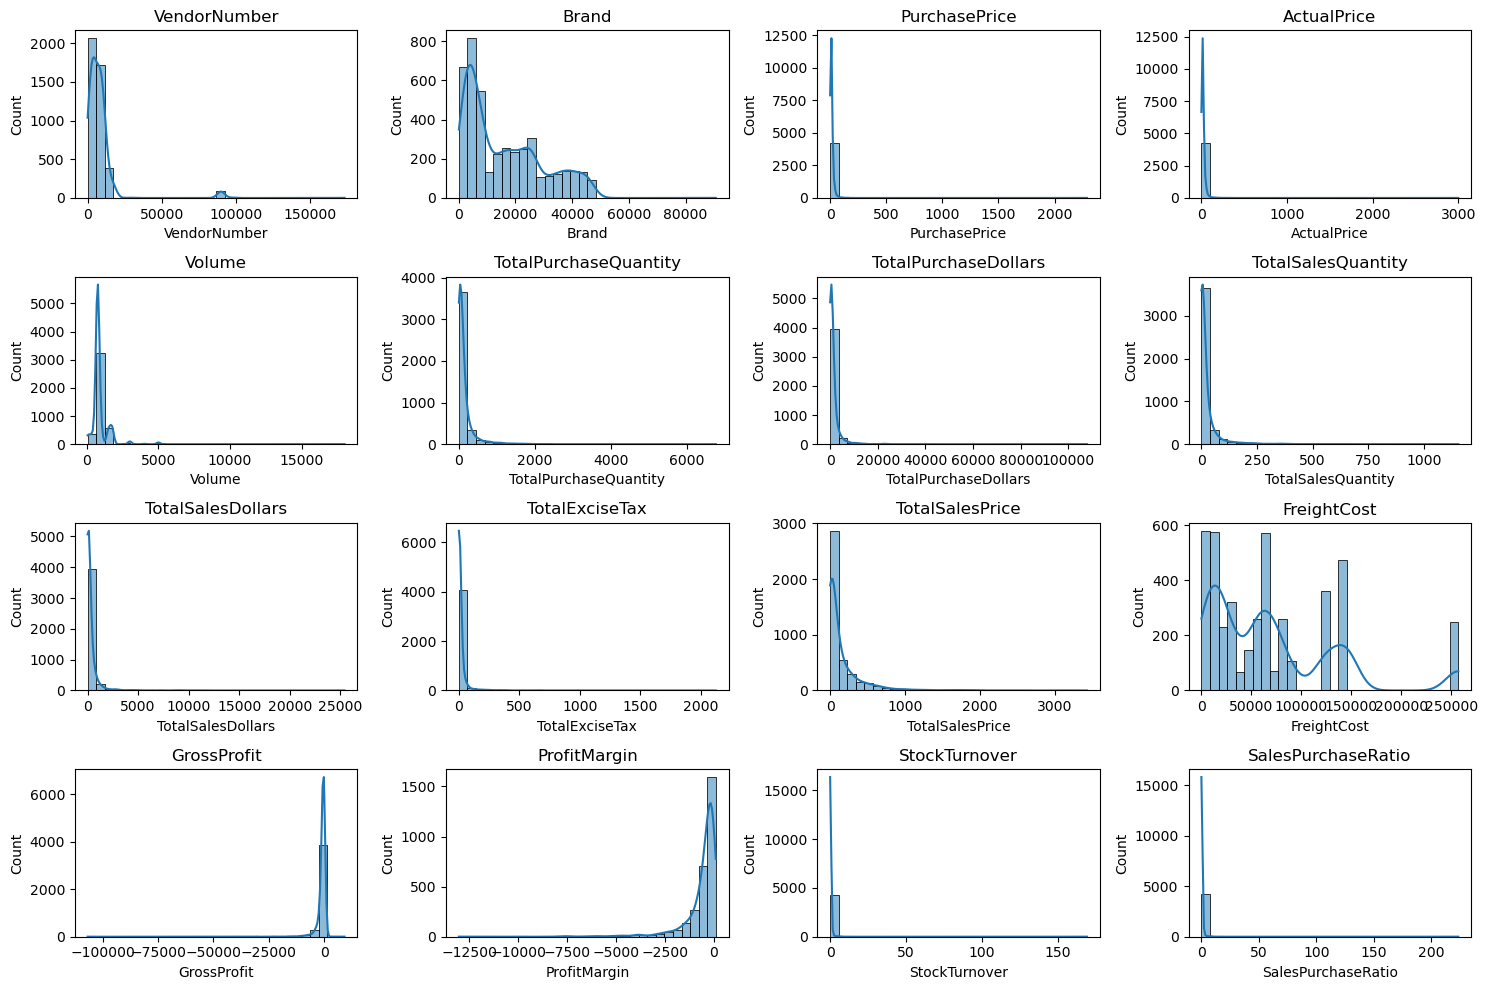

In [7]:
#Distribution plots for numerical columns 
numerical_cols =df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adust the grid layout)
    sns.histplot(df[col], kde=True , bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

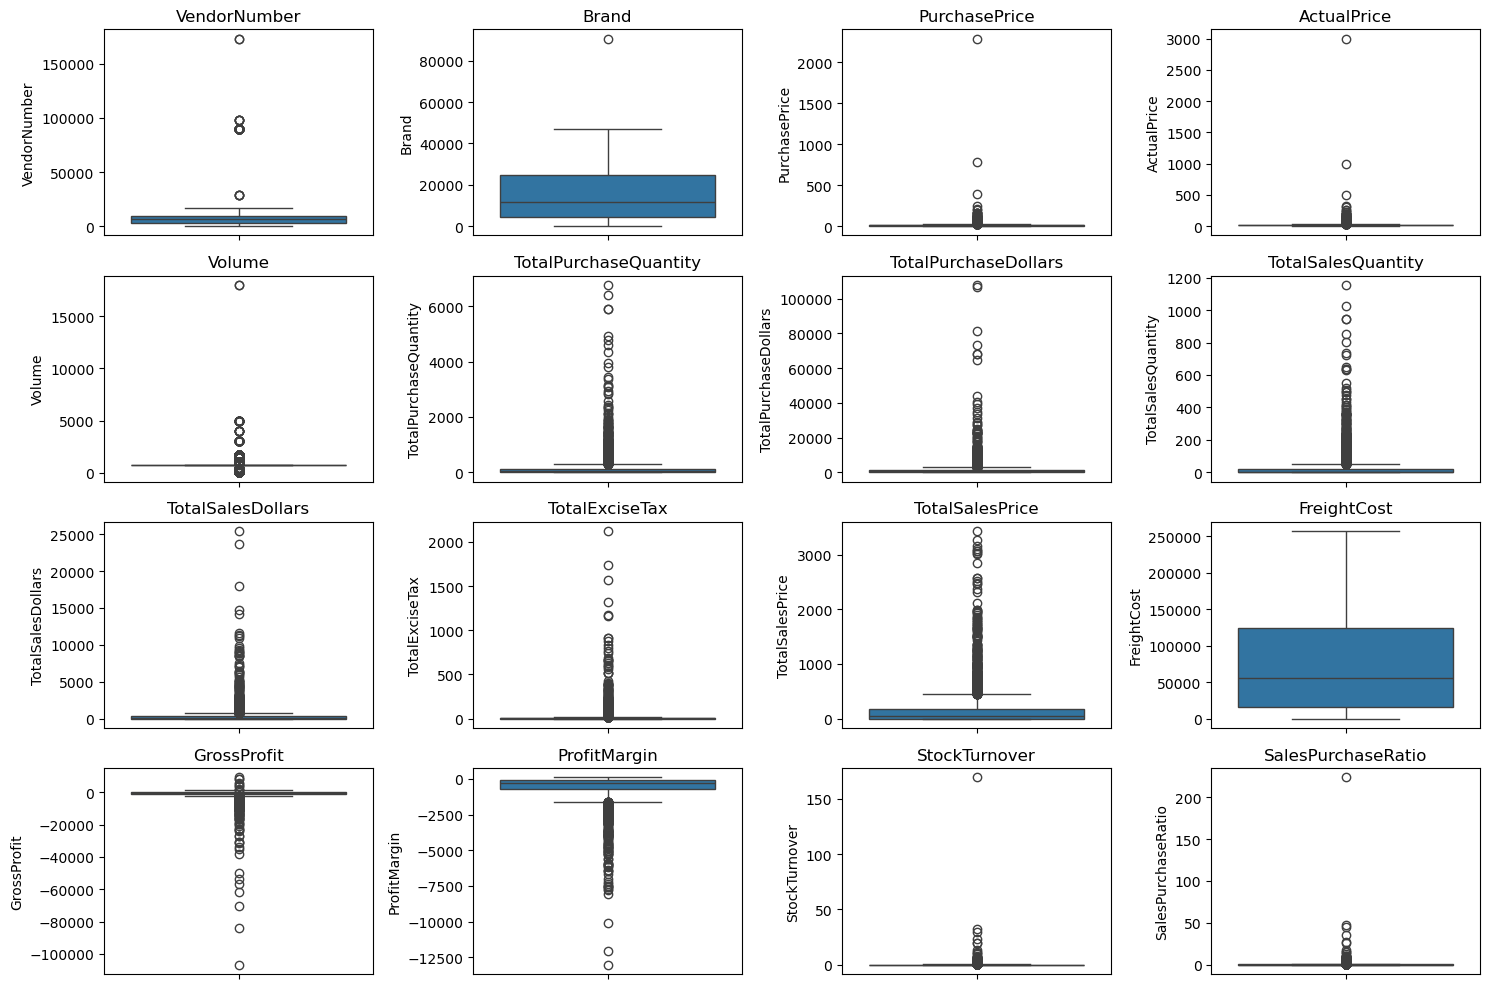

In [8]:
#Distribution plots for numerical columns 
plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adust the grid layout)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [9]:
#Summary statics insights
#negative & Zero Values:
#Gross profit: Min values is -106773, indicates losses.some products or transactions may be selling at loss due to high costs or selling at discounts lower than the purchase price.
#Profit margin : has a min value of -infinite , which suggest cases where revenue is zero or even lower than cost.
#Total sales quantity & sales dollars :min values are 0, meaning some productd were purchased but never sold, these could be slow moving.
#plots 
#purchase & Actual price : the max values (2270 & 2970) are significant higher than the mean ( 1.2 & 2.2, indicates the potential primiumproducts
#Frieght cost: huge varition form (27.61 & 257032.070000) suggest logistics inefficiency or bulf shipment
#stock turn over ranges from 0.00 to 169.333333 imply some products sell extremlu fast while others remain in stock indefinitely, value more 1 indicates that sold quanty for that product is higher that purchasedd quanity due to either sales are being fullfill from older stocks.

In [10]:
#lets filter out the data by removing the inconsistency
df = pd.read_sql_query("""select * from vendor_sales_summary
where GrossProfit>0
and ProfitMargin>0
and TotalSalesQuantity>0""",conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalSalesPrice,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,1069,17285.73,1155.0,25408.45,2122.27,2311.95,257032.07,8122.72,31.968577,1.080449,1.469909
1,3960,DIAGEO NORTH AMERICA INC,8512,Baileys Irish Cream,14.72,19.99,750.0,657,9671.04,736.0,14706.64,579.53,1776.11,257032.07,5035.60,34.240316,1.120244,1.520689
2,8112,MOET HENNESSY USA INC,42188,Moet & Chandon Nectar Imp Rs,34.01,52.99,750.0,148,5033.48,271.0,14224.79,30.47,367.43,48347.26,9191.31,64.614732,1.831081,2.826035
3,2000,SOUTHERN WINE & SPIRITS NE,27854,F Coppola Black Label Claret,10.20,14.99,750.0,283,2886.60,338.0,4387.30,37.88,1195.48,19016.59,1500.70,34.205548,1.194346,1.519885
4,6785,PALM BAY INTERNATIONAL INC,6937,Cavit Pinot Grigio,6.75,9.99,1500.0,377,2544.75,228.0,2725.72,51.20,813.32,13605.41,180.97,6.639347,0.604775,1.071115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,3252,E & J GALLO WINERY,4150,Shellback Spiced Rum,8.63,11.99,750.0,1,8.63,2.0,23.98,1.58,23.98,61966.91,15.35,64.011676,2.000000,2.778679
254,9165,ULTRA BEVERAGE COMPANY LLP,15035,Morellino d Scansano Rsv,7.33,10.99,750.0,1,7.33,32.0,351.68,3.53,252.77,68054.70,344.35,97.915719,32.000000,47.978172
255,9552,M S WALKER INC,33035,Cape Indaba Chard S Africa,5.88,8.99,750.0,1,5.88,2.0,17.98,0.22,17.98,55551.82,12.10,67.296997,2.000000,3.057823
256,480,BACARDI USA INC,4042,Bacardi Dragon Berry,0.72,0.99,50.0,5,3.60,8.0,7.92,0.42,2.97,89286.27,4.32,54.545455,1.600000,2.200000


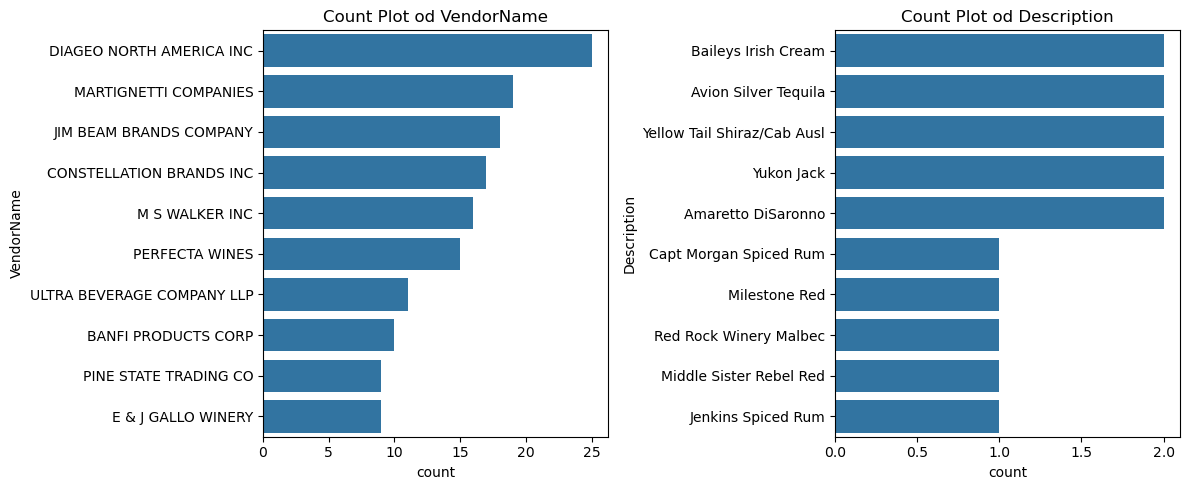

In [11]:
#count plots ofr category columns
category_cols = ["VendorName","Description"]
plt.figure(figsize=(12,5))
for i , col in enumerate(category_cols):
    plt.subplot(1,2,i+1) #adust the grid layout)
    sns.countplot(y=df[col],order = df[col].value_counts().index[:10])
    plt.title(f"Count Plot od {col}")
plt.tight_layout()
plt.show()


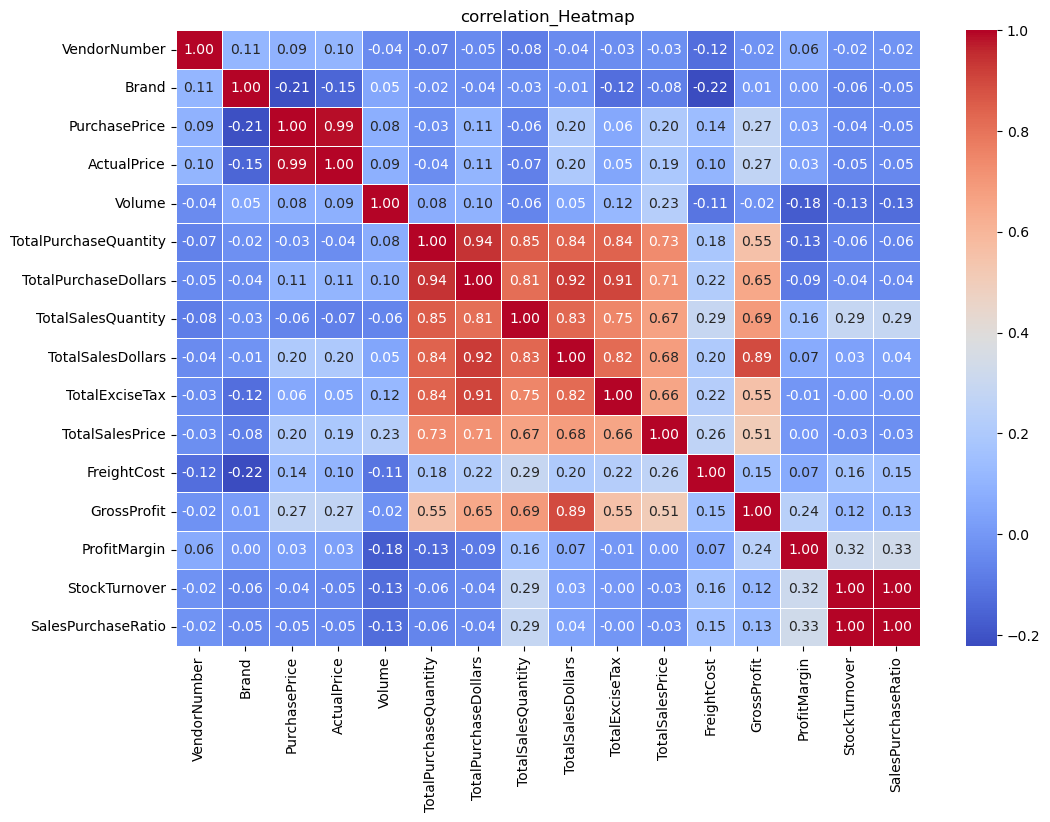

In [12]:
#colleration heat map
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot = True, fmt=".2f",cmap="coolwarm", linewidths
   =0.5)
plt.title("correlation_Heatmap")
plt.show()

In [13]:
#correlations insights
#PurchasePrice has weak correlations with TotalSalesDollars(fillthis) and Grossprofit(fillthis),suggessting that price variations do not significantlly impact sales revenue or profit
#Strong correlation between total purchase quantity and sales quantity (fill this),confirming the efficient inventory turnover.
#negative correlation between the profit margin & total sales prize (fill this )suggests that as sames price increasing margings decreasing, possibliy due to competetive pricing pressure 
#Stock turn over has weak negative correlation with both Grossprofit (fill this) and profit margin(fill this), indicating that faster trunover does not neccessory result in higher profitability.

In [14]:
#DATA ANALYSIS
#Identify brands that needs promotional or pricing adjustment which exhibit lower sales performance but higher profit margins

In [15]:
Brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':"mean"}).reset_index()

In [16]:
low_sales_threshold = Brand_performance['TotalSalesDollars'].quantile(0.20)
high_margin_threshold = Brand_performance['ProfitMargin'].quantile(0.50)

In [17]:
low_sales_threshold

119.88

In [18]:
high_margin_threshold

41.86513875229828

In [19]:
#Filter the brands with low sales but high profit margins
target_brands = Brand_performance[
               (Brand_performance['TotalSalesDollars']<= low_sales_threshold)&
               (Brand_performance['ProfitMargin']>=high_margin_threshold)
]
print("Brands with low sales but high PM")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high PM


,Description,TotalSalesDollars,ProfitMargin
15,Bacardi Dragon Berry,7.92,54.545455
50,Cape Indaba Chard S Africa,17.98,67.296997
211,Shellback Spiced Rum,23.98,64.011676
146,Marcati Limoncello,62.96,60.609911
27,Basilica Sambuca,68.91,66.390945
140,Lindemans Bin 90 Moscato,71.94,66.221852
167,Pearl Cucumber Vodka,89.10,59.214366
77,DeKuyper Buttershots,90.93,77.323216
232,The Famous Grouse,91.96,65.767725
11,Arrow Blackberry Brandy,95.88,47.914059


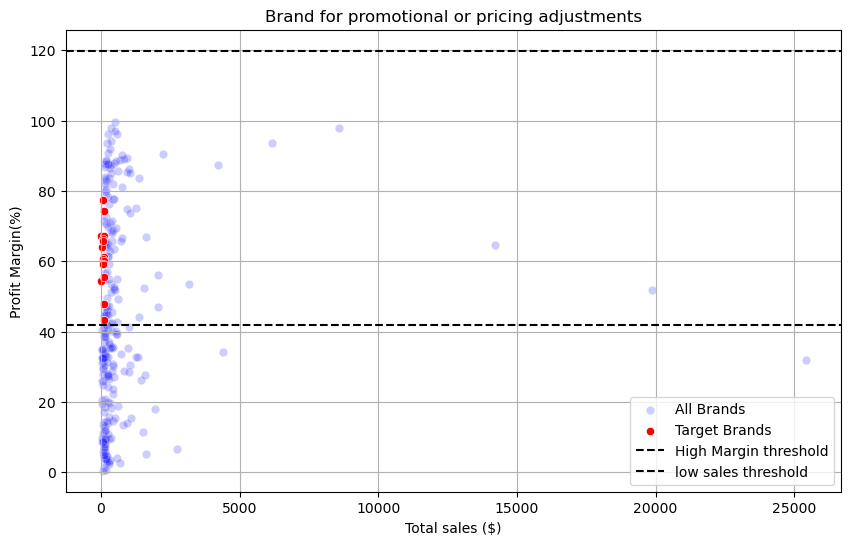

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=Brand_performance, x= 'TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x= 'TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle ='--', color = 'black', label="High Margin threshold")
plt.axhline(low_sales_threshold, linestyle ='--', color = 'black', label="low sales threshold")

plt.xlabel("Total sales ($)")
plt.ylabel("Profit Margin(%)")
plt.title("Brand for promotional or pricing adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors 

VendorName
DIAGEO NORTH AMERICA INC      56824.37
MOET HENNESSY USA INC         24651.01
JIM BEAM BRANDS COMPANY       10047.36
CONSTELLATION BRANDS INC       9355.01
ULTRA BEVERAGE COMPANY LLP     9325.28
MARTIGNETTI COMPANIES          8906.34
SOUTHERN WINE & SPIRITS NE     7428.28
TREASURY WINE ESTATES          7202.53
M S WALKER INC                 5923.28
BACARDI USA INC                5237.36
Name: TotalSalesDollars, dtype: float64

In [22]:
top_brands

Description
Capt Morgan Spiced Rum          25408.45
Baileys Irish Cream             19877.50
Moet & Chandon Nectar Imp Rs    14224.79
Moet Nectar Imperial Rose        8582.76
GlenDronach 15 Yr Scotch         6176.29
F Coppola Black Label Claret     4387.30
Jim Beam Traveler                4230.16
Ch St Jean Chard California      3159.35
Cavit Pinot Grigio               2725.72
Ch St Jean Cab Svgn Cal          2238.75
Name: TotalSalesDollars, dtype: float64

In [23]:
def format_dollars(value):
    if value >= 10000:
        return f"{value/10000:.2f}k"
    else:
        return str(value)

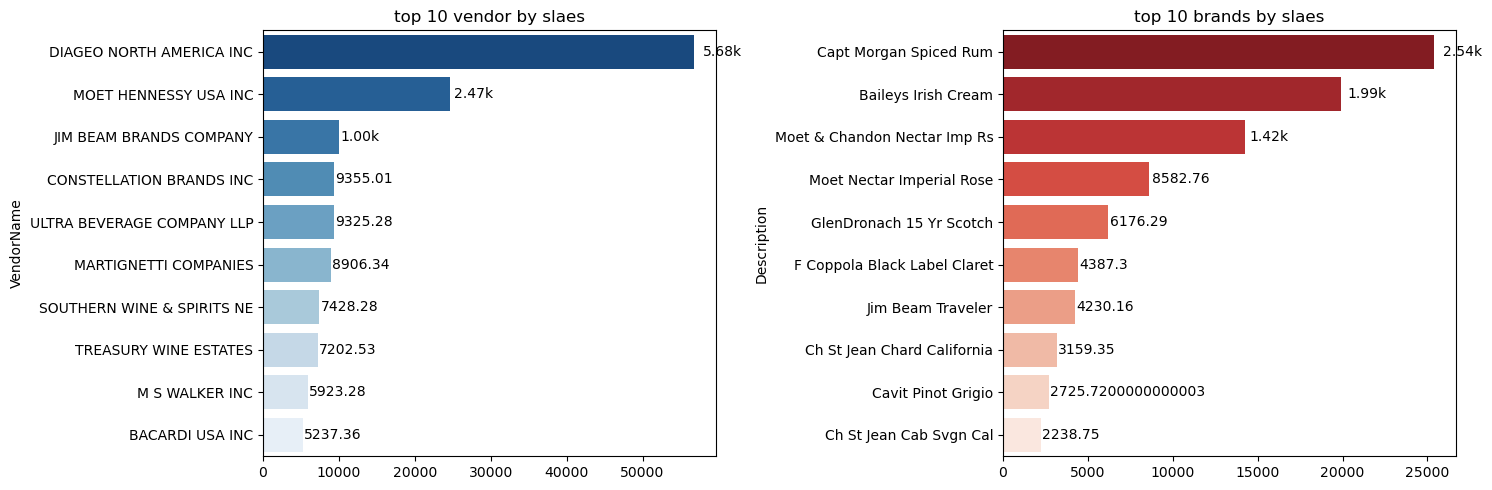

In [24]:
plt.figure(figsize=(15,5))

#plot for top vendors

plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("top 10 vendor by slaes")

for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width()*0.02),
             bar.get_y() + bar.get_height() /2,
             format_dollars(bar.get_width()),
             ha = "left", va = "center", fontsize = 10, color= "black")
#plot for top brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("top 10 brands by slaes")

for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width()*0.02),
             bar.get_y() + bar.get_height() /2,
             format_dollars(bar.get_width()),
             ha = "left", va = "center", fontsize = 10, color= "black")

plt.tight_layout()
plt.show()

In [30]:
#which vendors contribute the most to take total purchase dollar
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum' ,
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [32]:
vendor_performance['PurchaseContribution%'] = (vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum())

In [34]:
vendor_performance=vendor_performance.sort_values('PurchaseContribution%', ascending = False)
top_vendor=vendor_performance.head(10)

#DIAGEO NORTH AMERICA INC	 highest

In [28]:
#how much of total procurement is dependent on the top vendor?

In [36]:
print(f"Total Purchase contribution of top 10 vendors is {round(top_vendor['PurchaseContribution%'].sum(),2)}%")

Total Purchase contribution of top 10 vendors is 0.78%


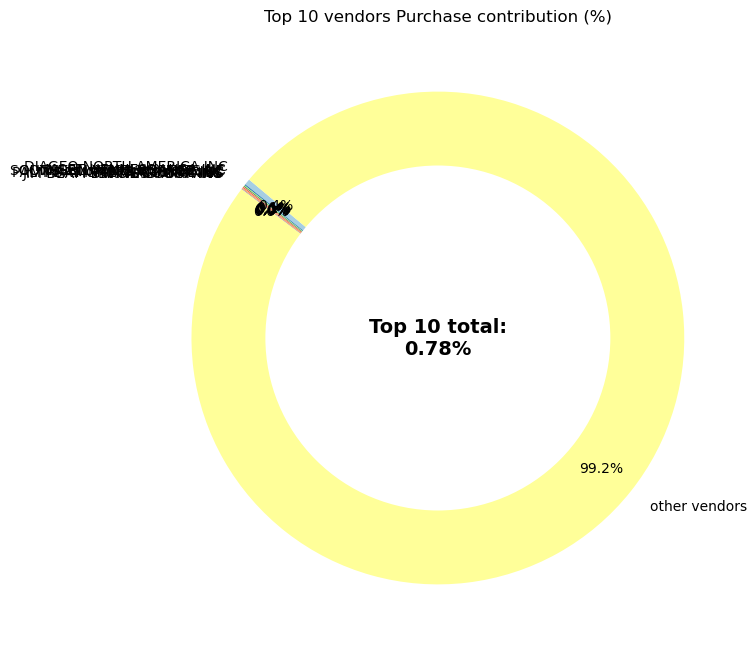

In [41]:
#Now we will creat donut chart for answering this 
vendors = list(top_vendor['VendorName'].values)
purchase_contribution = list(top_vendor['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution= 100 - total_contribution

#append "other vendors" cotegory
vendors.append ("other vendors")
purchase_contribution.append(remaining_contribution)

#donut chart

fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, sutotexts = ax.pie(purchase_contribution, labels= vendors, autopct = '%1.1f%%',
                                  startangle=140, pctdistance = 0.85, colors = plt.cm.Paired.colors)

#Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0,0), 0.70, fc = "white")
fig.gca().add_artist(centre_circle)

plt.text(0,0, f"Top 10 total:\n{total_contribution:.2f}%", fontsize=14, fontweight = "bold", ha="center", va="center")

plt.title("Top 10 vendors Purchase contribution (%)")
plt.show()


In [42]:
#does purchasing in the bulf reduced the unit price and what is the optimal purchase volume for cost savingds

df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalSalesPrice,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio,UnitPurchasePrice
0,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,1069,17285.73,1155.0,25408.45,2122.27,2311.95,257032.07,8122.72,31.968577,1.080449,1.469909,16.17
1,3960,DIAGEO NORTH AMERICA INC,8512,Baileys Irish Cream,14.72,19.99,750.0,657,9671.04,736.0,14706.64,579.53,1776.11,257032.07,5035.60,34.240316,1.120244,1.520689,14.72
2,8112,MOET HENNESSY USA INC,42188,Moet & Chandon Nectar Imp Rs,34.01,52.99,750.0,148,5033.48,271.0,14224.79,30.47,367.43,48347.26,9191.31,64.614732,1.831081,2.826035,34.01
3,2000,SOUTHERN WINE & SPIRITS NE,27854,F Coppola Black Label Claret,10.20,14.99,750.0,283,2886.60,338.0,4387.30,37.88,1195.48,19016.59,1500.70,34.205548,1.194346,1.519885,10.20
4,6785,PALM BAY INTERNATIONAL INC,6937,Cavit Pinot Grigio,6.75,9.99,1500.0,377,2544.75,228.0,2725.72,51.20,813.32,13605.41,180.97,6.639347,0.604775,1.071115,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,3252,E & J GALLO WINERY,4150,Shellback Spiced Rum,8.63,11.99,750.0,1,8.63,2.0,23.98,1.58,23.98,61966.91,15.35,64.011676,2.000000,2.778679,8.63
254,9165,ULTRA BEVERAGE COMPANY LLP,15035,Morellino d Scansano Rsv,7.33,10.99,750.0,1,7.33,32.0,351.68,3.53,252.77,68054.70,344.35,97.915719,32.000000,47.978172,7.33
255,9552,M S WALKER INC,33035,Cape Indaba Chard S Africa,5.88,8.99,750.0,1,5.88,2.0,17.98,0.22,17.98,55551.82,12.10,67.296997,2.000000,3.057823,5.88
256,480,BACARDI USA INC,4042,Bacardi Dragon Berry,0.72,0.99,50.0,5,3.60,8.0,7.92,0.42,2.97,89286.27,4.32,54.545455,1.600000,2.200000,0.72


In [43]:
df['ordersize']=pd.qcut(df['TotalPurchaseQuantity'],q=3, labels=['Small', 'medium', 'large'])

In [46]:
df.groupby('ordersize')[['UnitPurchasePrice']].mean()
#large orders by vendors are reducing there unit price for the goods there is around more
#than 60 cost reduction, this suggest that if we are purchaseing in bulk effectively cost saving and also 
#this suggest that the bulk pricing successfully encouage the vendors to purchase the large value, leading to higher overall sales despite lower per unit revene.


,UnitPurchasePrice
ordersize,
Small,13.706437
medium,9.497283
large,7.612405


In [ ]:
#which vendors have low inventory turnover, indicates excess stocks and slow moving products

In [52]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
TREASURY WINE ESTATES,0.533333
PALM BAY INTERNATIONAL INC,0.604775
KOBRAND CORPORATION,0.611765
WINE GROUP INC,0.617088
"STOLI GROUP,(USA) LLC",0.653846
DELICATO VINEYARDS INC,0.666667
E & J GALLO WINERY,0.672560
PERFECTA WINES,0.686795
BANFI PRODUCTS CORP,0.707194


In [ ]:
#How much capital is loacked in unsold inventory per vendor and which vendor is contributing the most


In [54]:
df['UnsoldInventoryValue']=(df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: -36384.56


In [56]:
#agg capital locked per vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

#sort vendors with the highest loacked capital

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue', ascending = False)
inventory_value_per_vendor['UnsoldInventoryValue']=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
24,PALM BAY INTERNATIONAL INC,875.77
44,WINE GROUP INC,718.74
3,BANFI PRODUCTS CORP,341.8
17,KOBRAND CORPORATION,196.35
41,TRINCHERO FAMILY ESTATES,138.21
30,REMY COINTREAU USA INC,98.78
12,E & J GALLO WINERY,77.74000000000001
37,"STOLI GROUP,(USA) LLC",56.52
8,DELICATO VINEYARDS INC,45.67
1,ATLANTIC IMPORTING COMPANY,21.32
